# housekeeping

In [79]:
import itertools
import polars as pl
import numpy as np
from scipy import stats
import pingouin
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "YuGothic"

/Users/domolm/.pyenv/versions/3.10.8/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# 表 4.2

In [3]:
N1 = 4
n1 = 2
x1 = [165, 166, 171, 180]
mu = np.mean(x1)
hensa = x1 - mu
hensa2 = hensa**2
sigma2 = sum(hensa2) / N1
sigma = np.sqrt(sigma2)

In [4]:
mu, sigma

(170.5, 5.937171043518958)

# 表 4.4

In [5]:
xs = itertools.combinations(x1, n1)
xs
xbars = map(np.mean, xs)
np.mean(list(xbars))

170.5

In [6]:
xs = list(itertools.combinations(x1, n1))
xbars = list(map(np.mean, xs))
np.mean(xbars)
hensab = xbars - mu
hensa2b = hensab**2
sigma2b = sum(hensa2b) / 6
sigmab = np.sqrt(sigma2b)

xs, xbars, np.mean(xbars) ,sigmab


([(165, 166), (165, 171), (165, 180), (166, 171), (166, 180), (171, 180)],
 [165.5, 168.0, 172.5, 168.5, 173.0, 175.5],
 170.5,
 3.427827300200522)

# 表 4.5

In [7]:
se0 = sigma / np.sqrt(n1)
correct = np.sqrt((N1-n1) / (N1-1))
se1 = se0 * correct

se1

3.427827300200522

# 4.1.5

In [8]:
stats.t.ppf(0.975, 80-1)

1.9904502099893602

# 4.2.2

In [9]:
stats.t.ppf(0.975, 49)

2.009575234489209

In [10]:
# ちなみに confint は例えば以下のように書ける
stats.t.interval(alpha=0.025, df=49, loc=250, scale=6/np.sqrt(50))
# なぜか下のセルと値が異なるが気にしないことにする

(249.9732726990254, 250.0267273009746)

In [63]:
250 - stats.t.ppf(0.975, 49)*6/np.sqrt(50), \
250 + stats.t.ppf(0.975, 49)*6/np.sqrt(50)

(248.29481886926575, 251.70518113073425)

# 図 4.2

Text(0, 0.5, '試行回数')

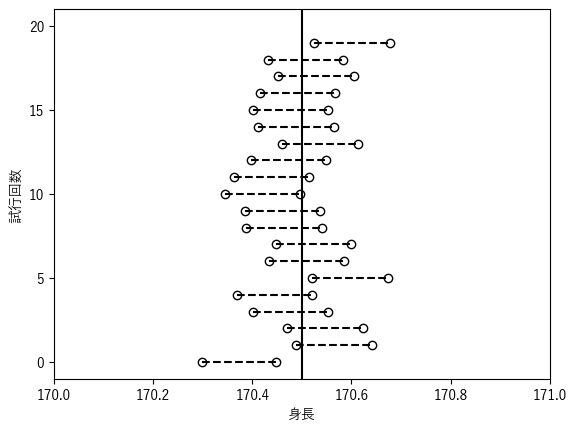

In [60]:
def get_confint(x, level=0.90):
    n = len(x)
    mean_x = np.mean(x)
    SE = np.std(x, ddof=1) / np.sqrt(n)
    Q = stats.t.ppf(level, n-1)
    lb = mean_x - Q*SE
    ub = mean_x + Q*SE
    estimates = [mean_x, lb, ub]
    return estimates

n_sims = 20
res_sim = []
for i in range(n_sims):
    smpl = np.random.choice(x1, size=10**4, replace=True)
    confint = get_confint(smpl, level=0.90)
    res_sim.append(confint)
res_sim

df_res_sim = pl.DataFrame(res_sim).transpose()
fig, ax = plt.subplots()
for idx, row in enumerate(df_res_sim.iter_rows()):
    ax.scatter(x=[row[1], row[2]], y=[idx, idx], 
               c='white', edgecolors='black')
    ax.plot([row[1], row[2]], [idx, idx], 
            ls='--', c='black')
ax.vlines(mu, -1, 21, colors='black')
plt.yticks(np.arange(0, 21, 5))
plt.xlim([170.0, 171.0])
plt.ylim([-1, 21])
plt.xlabel('身長')
plt.ylabel('試行回数')


# 4.2.3

In [65]:
data04 = pl.read_csv('../causality-main/data04.csv', parse_dates=True)
print(data04)

shape: (20, 7)
┌─────┬─────┬─────┬──────┬──────┬─────┬─────┐
│ x1  ┆ y3  ┆ t1  ┆ y0   ┆ y1   ┆ y0t ┆ y1t │
│ --- ┆ --- ┆ --- ┆ ---  ┆ ---  ┆ --- ┆ --- │
│ i64 ┆ i64 ┆ i64 ┆ i64  ┆ i64  ┆ i64 ┆ i64 │
╞═════╪═════╪═════╪══════╪══════╪═════╪═════╡
│ 74  ┆ 76  ┆ 1   ┆ null ┆ 76   ┆ 68  ┆ 76  │
│ 82  ┆ 75  ┆ 0   ┆ 75   ┆ null ┆ 75  ┆ 84  │
│ 72  ┆ 75  ┆ 1   ┆ 65   ┆ null ┆ 65  ┆ 75  │
│ 96  ┆ 84  ┆ 0   ┆ 84   ┆ null ┆ 84  ┆ 97  │
│ ... ┆ ... ┆ ... ┆ ...  ┆ ...  ┆ ... ┆ ... │
│ 80  ┆ 72  ┆ 0   ┆ null ┆ 82   ┆ 72  ┆ 82  │
│ 89  ┆ 80  ┆ 0   ┆ null ┆ 89   ┆ 80  ┆ 89  │
│ 88  ┆ 80  ┆ 0   ┆ null ┆ 90   ┆ 80  ┆ 90  │
│ 86  ┆ 78  ┆ 0   ┆ null ┆ 87   ┆ 78  ┆ 87  │
└─────┴─────┴─────┴──────┴──────┴─────┴─────┘


In [66]:
data04.describe()

describe,x1,y3,t1,y0,y1,y0t,y1t
str,f64,f64,f64,f64,f64,f64,f64
"""count""",20.0,20.0,20.0,20.0,20.0,20.0,20.0
"""null_count""",0.0,0.0,0.0,12.0,8.0,0.0,0.0
"""mean""",81.95,76.6,0.3,73.125,84.083333,73.8,83.85
"""std""",8.999854,5.245549,0.470162,6.812541,9.129954,7.898034,8.430989
"""min""",58.0,61.0,0.0,65.0,61.0,52.0,61.0
"""max""",96.0,87.0,1.0,84.0,96.0,87.0,97.0
"""median""",83.5,76.5,0.0,75.0,85.5,75.0,84.5


In [68]:
data04.glimpse()

'Rows: 20\nColumns: 7\n$ x1  <i64> 74, 82, 72, 96, 83, 72, 85, 87, 86, 77\n$ y3  <i64> 76, 75, 75, 84, 75, 74, 76, 77, 77, 80\n$ t1  <i64> 1, 0, 1, 0, 0, 1, 0, 0, 0, 1\n$ y0  <i64> None, 75, 65, 84, None, 65, None, 77, 77, None\n$ y1  <i64> 76, None, None, None, 84, None, 87, None, None, 80\n$ y0t <i64> 68, 75, 65, 84, 75, 65, 76, 77, 77, 70\n$ y1t <i64> 76, 84, 75, 97, 84, 74, 87, 89, 87, 80\n'

# 表 4.8

In [78]:
n1 = len(data04)
diff = data04['y1t'] - data04['y0t']
m1 = pl.mean(diff)
s1 = pl.std(diff, ddof=1)
t_alpha = stats.t.ppf(0.975, n1-1)
m1 + t_alpha * s1/np.sqrt(n1)
m1 - t_alpha * s1/np.sqrt(n1)

9.43367450849425

In [83]:
pingouin.ttest(diff, 0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,34.129518,19,two-sided,1.629145e-18,"[9.43, 10.67]",7.631592,2.001e+15,1.0


# 表 4.10

In [130]:
# R との仕様の違いのせいか、欠測値が null として保存されていることに注意
y0obs = data04.select(
    pl.col('y0')
    .drop_nulls()
).to_numpy()
y1obs = data04.select(
    pl.col('y1')
    .drop_nulls()
).to_numpy()
n0 = len(y0obs)
n1 = len(y1obs)
s0 = y0obs.std(ddof=1)
s1 = y1obs.std(ddof=1)
num = (s1**2/n1 + s0**2/n0)**2
denom = ((s1**2/n1)**2)/(n1-1) + ((s0**2/n0)**2)/(n0-1)
df1 = num/denom
xbar = np.mean(y1obs) - np.mean(y0obs)
se1 = np.sqrt((s0**2/n0) + (s1**2/n1))
t_alpha = stats.t.ppf(0.975, df1)
xbar + t_alpha*se1
xbar - t_alpha*se1

3.4472968190287663

In [136]:
pingouin.ttest(y1obs.ravel(), y0obs.ravel(), correction='auto')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.069227,17.674073,two-sided,0.006714,"[3.45, 18.47]",1.319339,6.988,0.780413
